<a href="https://colab.research.google.com/github/abduqodir-pulatov/class_works/blob/main/Eksport_Uzb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/sdmx_data_1105.csv')
df.head()

,Code,Klassifikator,Klassifikator_ru,Klassifikator_en,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,192,Kuba,Куба,Cuba,1.5,0.7,3.7,8.8,10.5,0.2,4.6,0.4,2.5,0.7,0.1,0.1,5.8,2.1
1,384,Kot D'ivuar,Кот-д'Ивуар,Côte d’Ivoire,0.0,2.2,0.1,0.0,0.2,0.1,1.0,2.5,8.3,0.8,0.5,4.8,7.8,26.7
2,598,Papua - Yangi Gvineya,Папуа-Новая Гвинея,Papua New Guinea,0.0,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.0,0.0
3,798,Tuvalu,Тувалу,Tuvalu,0.0,0.0,0.0,0.0,3.0,0.0,0.9,0.0,0.0,0.0,0.0,1.9,0.0,0.0
4,148,Chad,Чад,Chad,0.0,0.0,0.0,0.0,0.3,0.9,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0


In [ ]:
df_numeric = df.iloc[:, 4:]
df["Total"] = df_numeric.sum(axis=1)

top_countries = df.sort_values(by="Total", ascending=False).head(5)

top_countries[["Klassifikator", "Total"]]


,Klassifikator,Total
61,Boshqa mamlakatlar,61170233.5
51,Rossiya,40198700.9
45,Xitoy,29362087.6
43,Qozog'iston,20316180.9
58,Turkiya,14485049.9


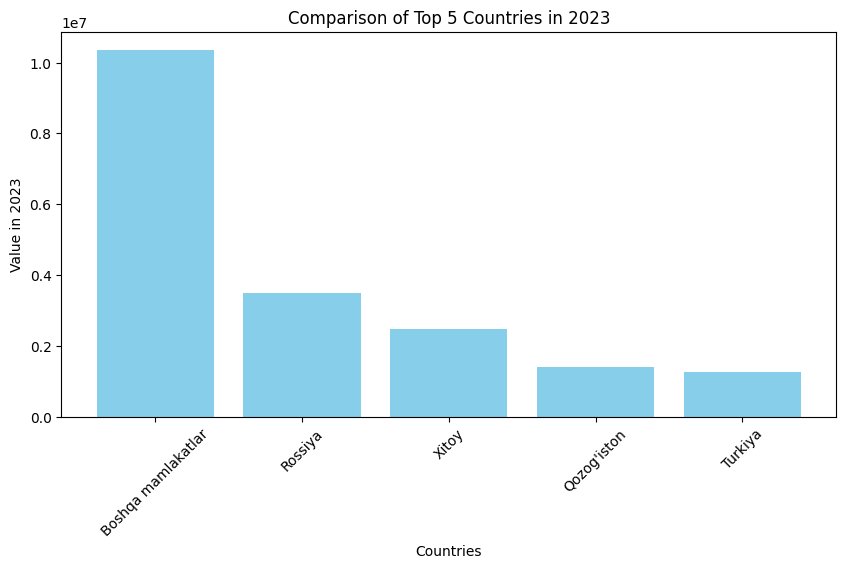

In [ ]:
import matplotlib.pyplot as plt

countries = top_countries["Klassifikator"]
values_2023 = top_countries["2023"]

plt.figure(figsize=(10, 5))
plt.bar(countries, values_2023, color="skyblue")
plt.xlabel("Countries")
plt.ylabel("Value in 2023")
plt.title("Comparison of Top 5 Countries in 2023")
plt.xticks(rotation=45)
plt.show()


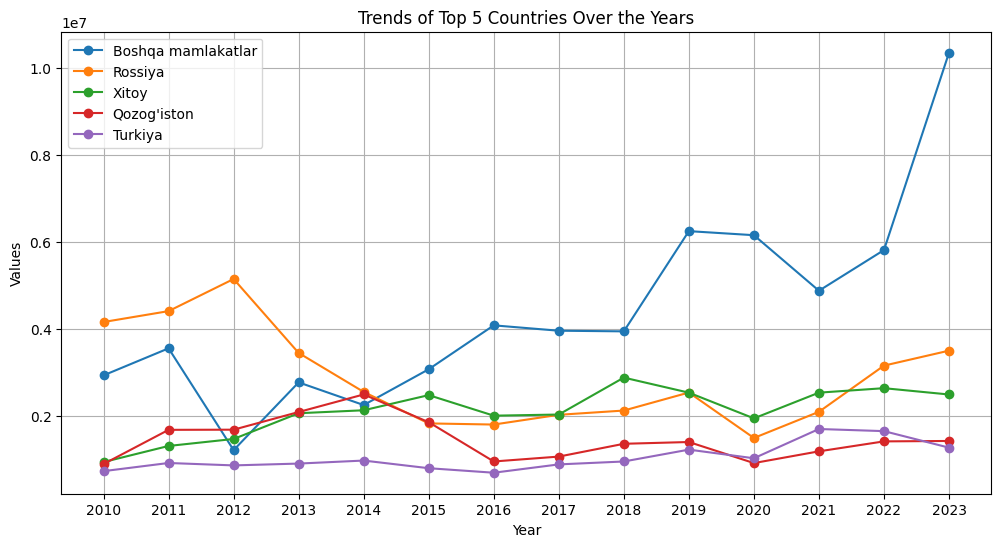

In [ ]:
years = df_numeric.columns

plt.figure(figsize=(12, 6))

for _, row in top_countries.iterrows():
    plt.plot(years, row.iloc[4:-1], marker='o', label=row["Klassifikator"])

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Trends of Top 5 Countries Over the Years")
plt.legend()
plt.grid(True)
plt.show()





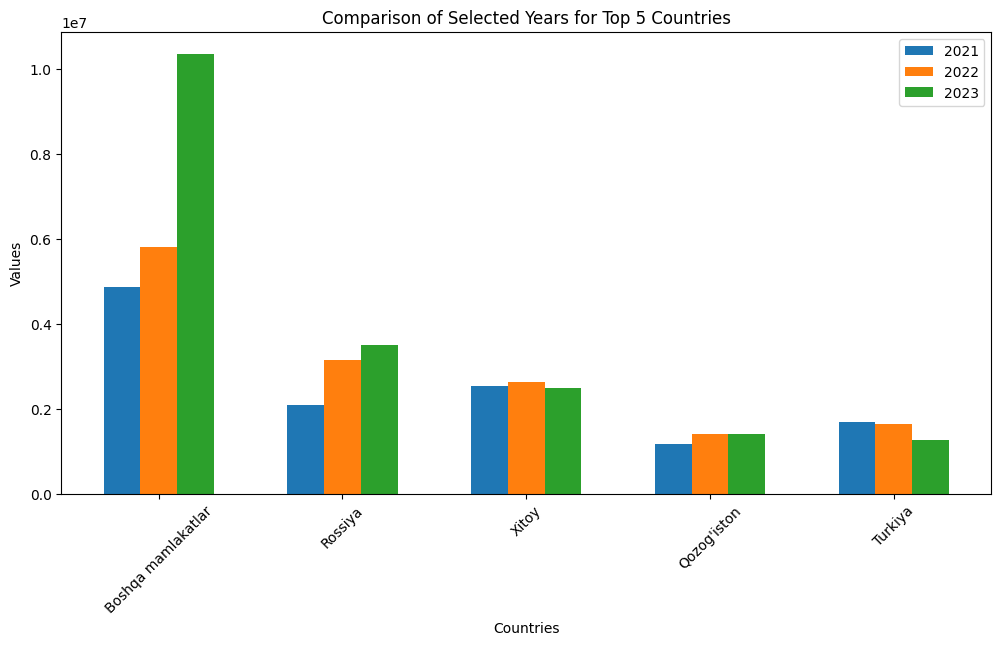

In [ ]:
selected_years = ["2021", "2022", "2023"]

bar_width = 0.2
x = np.arange(len(top_countries))

plt.figure(figsize=(12, 6))

for i, year in enumerate(selected_years):
    plt.bar(x + i * bar_width, top_countries[year], width=bar_width, label=year)

plt.xlabel("Countries")
plt.ylabel("Values")
plt.title("Comparison of Selected Years for Top 5 Countries")
plt.xticks(x + bar_width, top_countries["Klassifikator"], rotation=45)
plt.legend()
plt.show()


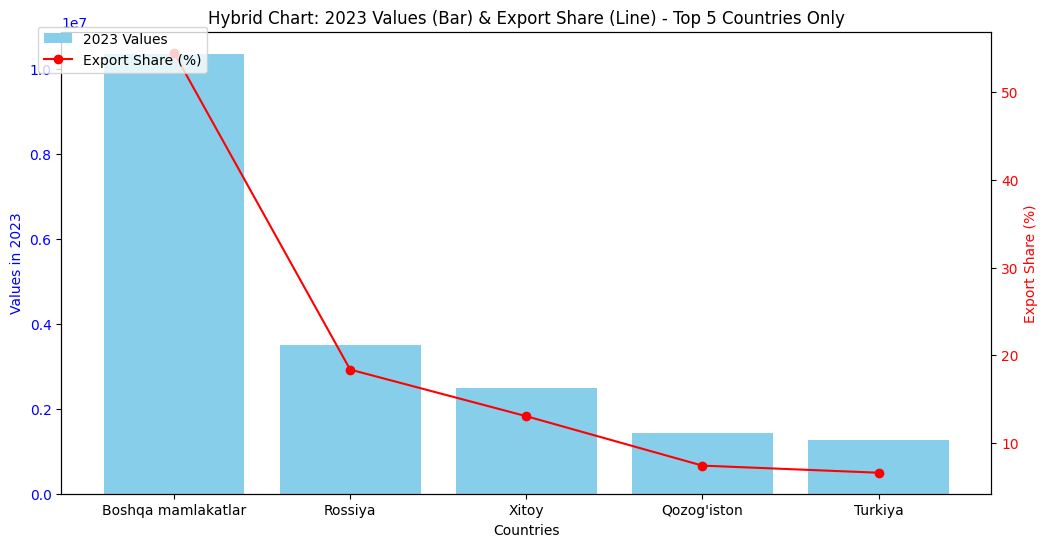

In [ ]:
top_countries_hybrid = df.sort_values(by="2023", ascending=False).head(5)

total_exports_top5_2023 = top_countries_hybrid["2023"].sum()

top_countries_hybrid["Export Share (%)"] = (top_countries_hybrid["2023"] / total_exports_top5_2023) * 100

countries = top_countries_hybrid["Klassifikator"]
values_2023 = top_countries_hybrid["2023"]
export_share_percentage = top_countries_hybrid["Export Share (%)"]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(countries, values_2023, color="skyblue", label="2023 Values")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Values in 2023", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(countries, export_share_percentage, color="red", marker="o", linestyle="-", label="Export Share (%)")
ax2.set_ylabel("Export Share (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Hybrid Chart: 2023 Values (Bar) & Export Share (Line) - Top 5 Countries Only")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()


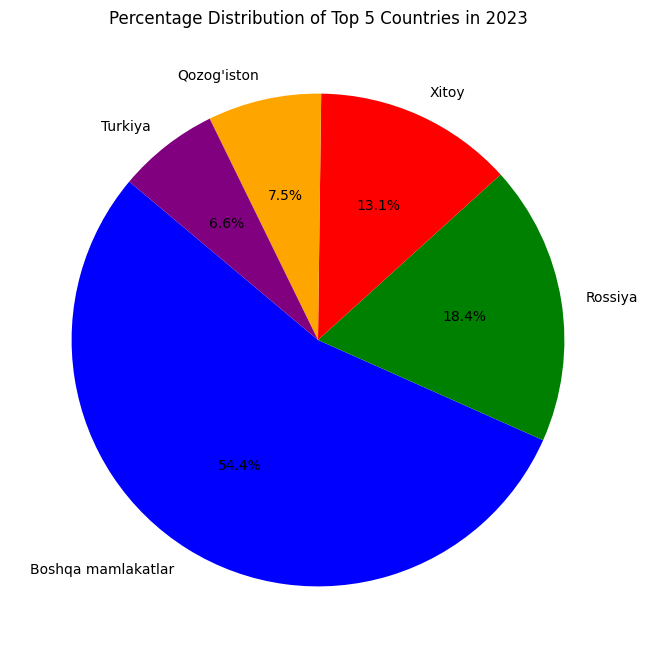

In [ ]:
countries = top_countries["Klassifikator"]
values_2023 = top_countries["2023"]

plt.figure(figsize=(8, 8))
plt.pie(values_2023, labels=countries, autopct='%1.1f%%', startangle=140, colors=["blue", "green", "red", "orange", "purple"])

plt.title("Percentage Distribution of Top 5 Countries in 2023")
plt.show()


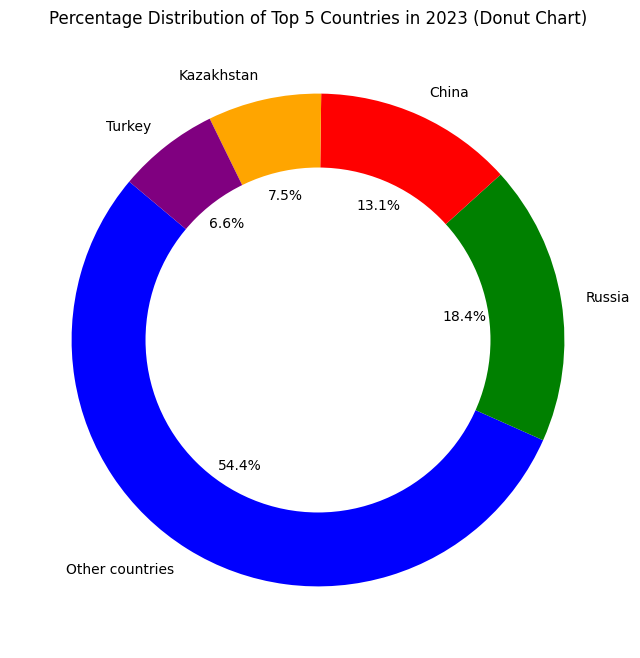

In [ ]:
countries = top_countries["Klassifikator_en"]
values_2023 = top_countries["2023"]

plt.figure(figsize=(8, 8))
plt.pie(values_2023, labels=countries, autopct='%1.1f%%', startangle=140, colors=["blue", "green", "red", "orange", "purple"])

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Percentage Distribution of Top 5 Countries in 2023 (Donut Chart)")
plt.show()


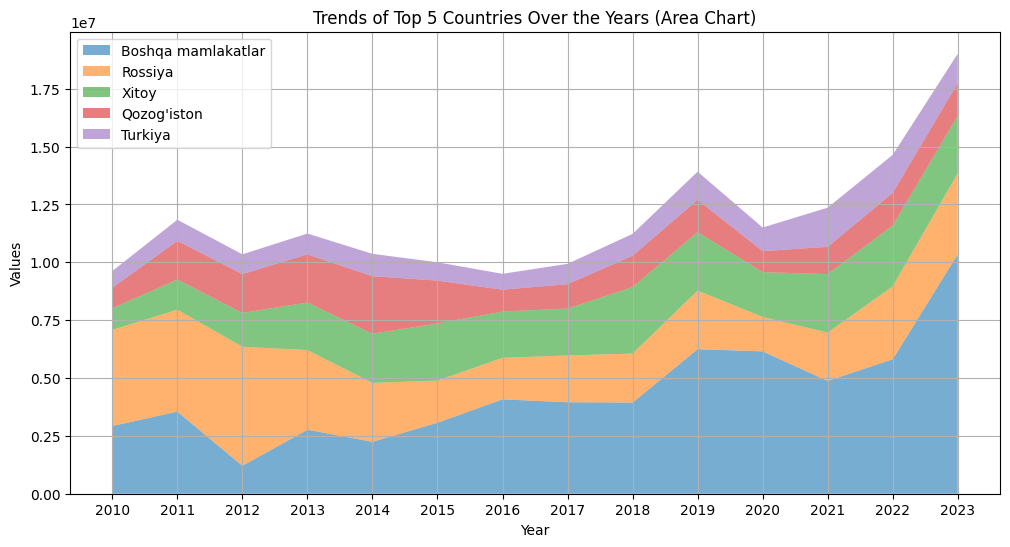

In [ ]:
years = df_numeric.columns
area_data = top_countries.iloc[:, 4:-1]

plt.figure(figsize=(12, 6))
plt.stackplot(years, area_data.values, labels=top_countries["Klassifikator"], alpha=0.6)

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Trends of Top 5 Countries Over the Years (Area Chart)")
plt.legend(loc="upper left")
plt.grid(True)

plt.show()
